<a href="https://colab.research.google.com/github/AlsT26/ML_Case-Based-2/blob/main/ML_Case-Based-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

#visualisasi data
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output
import warnings 
warnings.filterwarnings('ignore')

In [49]:
#Read Data
df = pd.read_csv('https://raw.githubusercontent.com/AlsT26/ML_Case-Based-2/main/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


##Exploratory Data Analysis

In [50]:
df.shape

(167, 10)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [52]:
#Drop kolom "Country"
df_new = df.drop(columns = 'country')

In [53]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [54]:
#Checking for null values
df_new.isnull().any()

child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [55]:
df_new.describe()

#mean dari kolom Income, GDPP dan Child mortality lebih tinggi dari 50 persentil, yang berarti bahwa histogramnya akan miring ke kanan.
#Also, Inflation ranges from negative values to high positive values. This suggests there might be distant outliers.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


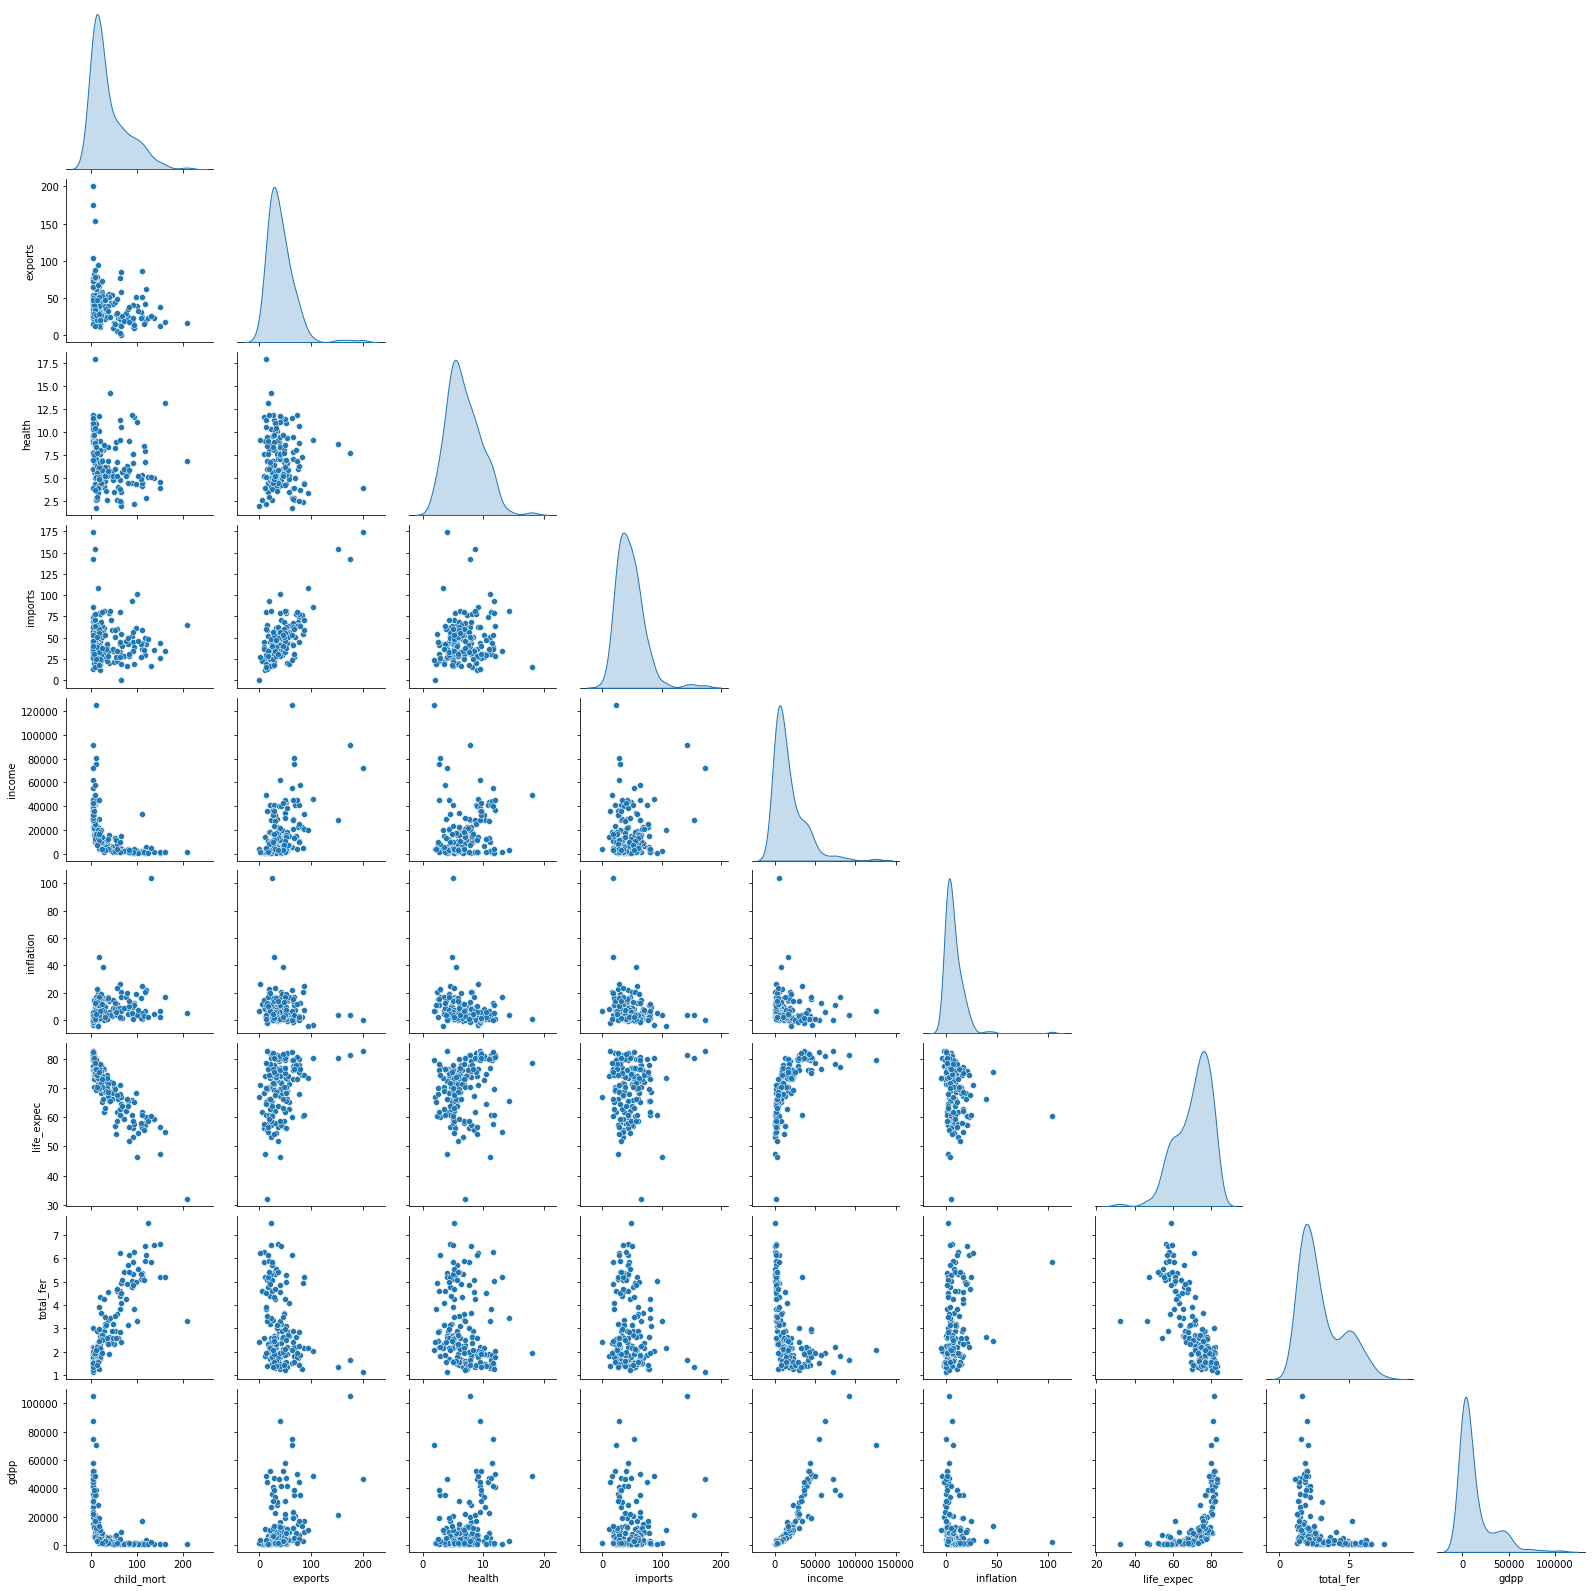

In [56]:
sns.pairplot(df_new, diag_kind = 'kde', corner = True)

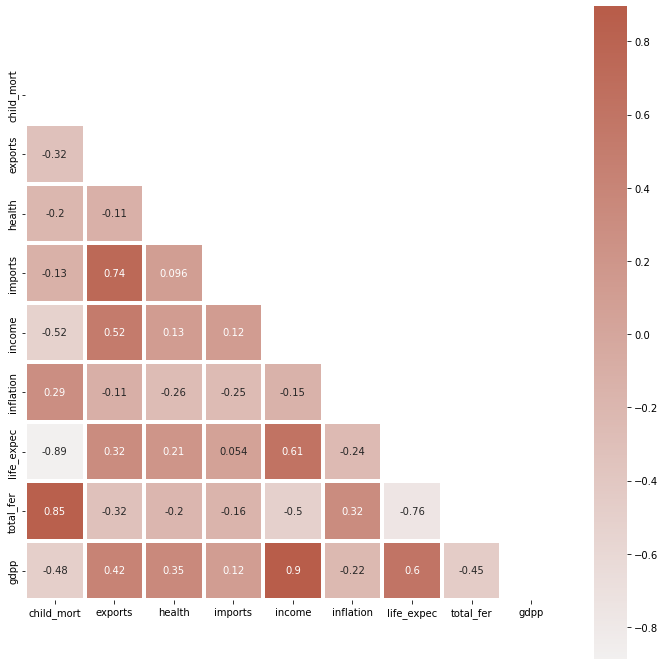

In [57]:
#Korelasi
corr = df_new.corr()
mask = np.triu(np.ones_like(corr, dtype = np.bool))
plt.rcParams['figure.figsize'] = 12, 12
cmap = sns.light_palette((20, 60, 50), input = "husl", as_cmap = True)
sns.heatmap(corr, mask = mask, center = 0, cmap = cmap, square = True, annot = True, linewidth = 3)

##Scaling Data

####MinMaxScaling

In [58]:
#mengurangi data minimum di tiap kolom dari tiap data di kolom agar nilai minimum tiap itemnya menjadi 0, lalu membagi dengan range nya agar membuat ulang skala semuanya menjadi dari 0 ke 1
#lalu dikali dengan 9 dan ditambah 1 agar skala yang tadinya dari 0 ke 9, menjadi dari 1 ke 10
df_new = ((df_new - df_new.min()) / (df_new.max() - df_new.min())) * 9 + 1
df_new.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,2.562953,2.846005,3.799950,3.422865,2.196398,1.997380,7.826454,3.552315,2.093820
std,1.767090,1.234213,1.536454,1.252695,1.394816,0.879182,1.578670,2.148995,1.574496
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.247566,2.066676,2.739590,2.559251,1.198680,1.500693,6.893491,1.915615,1.094408
50%,1.731743,2.570951,3.522685,3.237094,1.676568,1.798447,8.278107,2.788644,1.380466
75%,3.607108,3.307102,4.798011,4.036535,2.605574,2.244247,8.934911,4.875394,2.187097
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [59]:
df_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4.838364,1.445338,4.227470,3.319884,1.072425,2.135292,5.278107,7.629338,1.027661
1,1.613437,2.255779,3.651336,3.511336,1.674398,1.723593,8.846154,1.709779,1.331501
2,2.082278,2.724035,2.320075,2.621343,1.889285,2.689215,8.881657,3.470032,1.363285
3,6.100292,3.800121,1.581728,3.216396,1.382817,3.213197,5.970414,8.111987,1.283395
4,1.337390,3.043709,3.360472,4.044296,2.337870,1.469920,8.934911,2.391167,2.028176


In [75]:
#membuat centroid
#mengiterasi setiap kolom di data untuk diambil sample yang akan dijadikan sebagai centroid di tiap kolomnya

#menambahkan tiap cenrtoid random tadi ke arr centroid sebanyak k cluster
def rand_centroid(df_new, k):
  centroid = []
  for i in range(k):
    cent = df_new.apply(lambda x: random.uniform(1,10))
    centroid.append(cent)
  return pd.concat(centroid, axis=1)
#menggabungkan setiap centroid menjadi 1 dataframe

In [61]:
centroids = rand_centroid(df_new, 9)

In [62]:
centroids

,0,1,2,3,4,5,6,7,8
child_mort,91.359080,65.993576,48.990048,33.907958,95.741860,50.069660,7.110893,1.543967,90.400538
exports,91.906358,41.179750,2.438926,69.129724,58.763018,62.358259,65.264329,61.231864,2.702179
health,18.556335,83.255730,34.529742,75.536949,78.032187,93.127846,77.208589,75.767928,86.449435
imports,31.711397,99.776460,35.303019,18.923479,53.115953,91.479523,71.383478,75.679173,46.539637
income,79.725746,27.060073,66.159842,16.957187,38.835260,7.302630,6.968387,7.685128,11.092131
inflation,78.045487,69.678903,97.667733,51.891899,17.413081,64.954088,42.175837,58.369486,70.580507
life_expec,15.021999,27.557120,62.800170,83.014895,33.862536,23.387042,83.477134,5.902325,75.122853
total_fer,80.860310,43.452501,46.663967,94.327330,31.611857,63.312246,75.275878,85.612447,62.811559
gdpp,10.374203,93.808223,49.393681,14.822744,84.586439,27.892057,89.538293,90.810612,49.906103


###Label data
#####melabel tiap data berdasarkan jaraknya ke centroid terdekat

In [63]:
#menggunakan rumus eucladian

#fungsi untuk mengurangi nilai dari tiap kolom dengan nilai  centroid dan mengambil nilai akar pangkat 2 nya
def labeling(df, centroid):
  jarak = centroids.apply(lambda x: np.sqrt(((df_new - x) ** 2).sum(axis=1)))
  #return hasil pencarian nilai minimum di tiap jaraknya dan melabel cluster centroid masing-masing datanya berdasarkan nilai minimumnya
  return jarak.idxmin(axis=1)

In [64]:
label = labeling(df_new, centroids)
label

0      2
1      2
2      2
3      2
4      2
      ..
162    2
163    2
164    2
165    2
166    2
Length: 167, dtype: int64

In [65]:
label.value_counts()

2    167
dtype: int64

In [66]:
#Mencari nilai mean dari tiap baris cluster atau tiap centroid di clusternya masing-masing untuk dijadikan centroid baru
def new_centroid(df, label, k):
  return df_new.groupby(label).apply(lambda x: np.exp(np.log(x).mean())).T

In [67]:
#visualisasi data selama perulangan
def plot_cluster(df, label, centroids, iteration):
  pca = PCA(n_components = 2)
  data_2d = pca.fit_transform(df)
  centroids_2d = pca.fit_transform(centroids.transpose())
  #clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c = label)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

def plot(df, label, centroid, iterasi):
    pca = PCA(n_components=2)
    df_2d = pca.fit_transform(df)
    centroid_2d = pca.fit_transform(centroid.T)
    plt.title(f'Iterasi ke {iterasi}')

    plt.scatter(x = df_2d[:,0], y = df_2d[:,1], c = label)
    plt.scatter(x = centroid_2d[:,0], y = centroid_2d[:,1])
    plt.show()

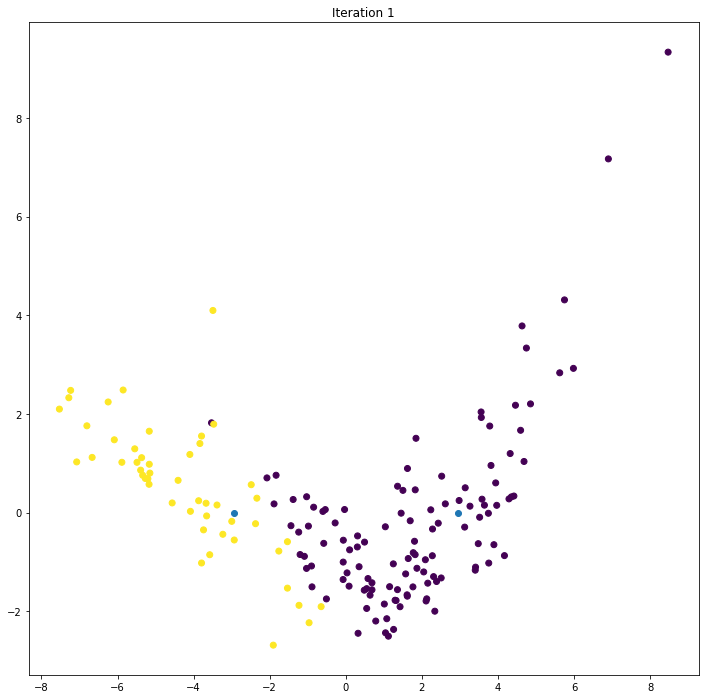

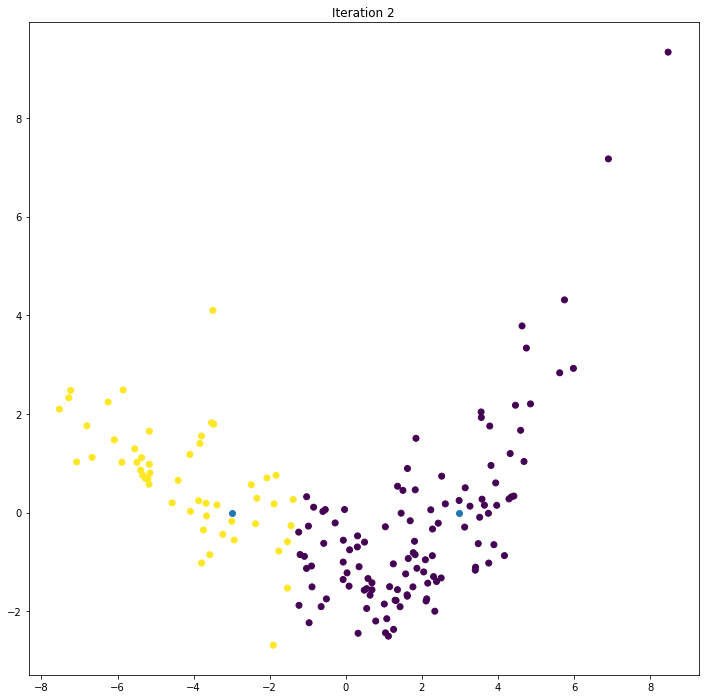

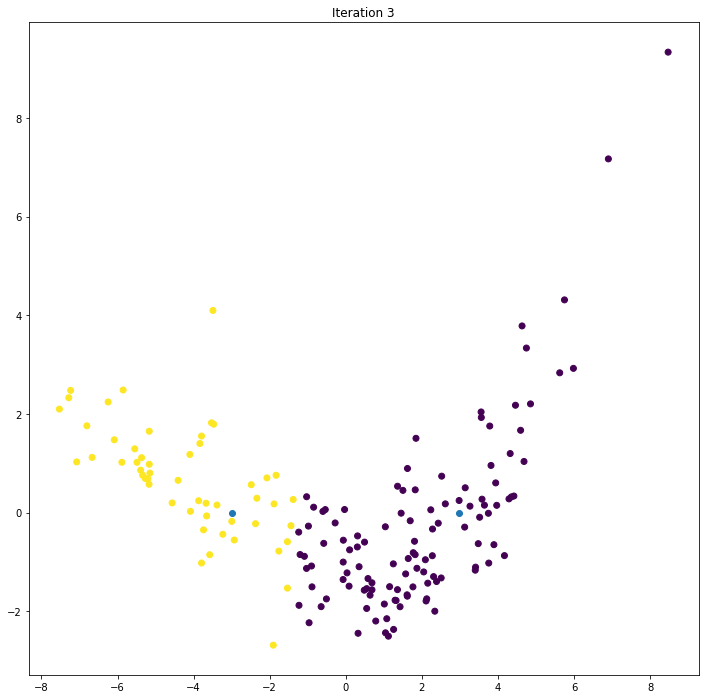

In [80]:
# max_iter = 100
# k = 2

# centroids = rand_centroid(df_new,k)
# cent_old = pd.DataFrame()
# iteration = 1

# while iteration < max_iter and not centroids.equals(cent_old):
#   cent_old = centroids

#   labels = labeling(df_new, centroids)
#   centroids = new_centroid(df_new, labels, k)
#   plot_cluster(df_new, labels, centroids, iteration)
#   iteration += 1

max_iterations = 100
k = 2

centroids = rand_centroid(df, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids
  labels = labeling(df_new, centroids)
  centroids = new_centroid(df_new, labels, k)
  plot_cluster(df_new, labels, centroids, iteration)
  df['clusters'] = labels
  iteration += 1

In [81]:
centroids

,0,1
child_mort,1.490245,4.536280
exports,2.894005,2.169797
health,3.633294,3.195201
imports,3.320047,3.050662
income,2.335659,1.197254
inflation,1.778404,2.154816
life_expec,8.654086,5.737825
total_fer,2.187053,6.005429
gdpp,2.113493,1.123740


##Menentukan K Terbaik

In [82]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [83]:
def evaluate(df):
  df_test = df.copy()
  sse = {};sil = [];kmax = 10
  fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

  if 'Class' in df_test.columns:
    df_test.pop('Class')
  if 'country' in df_test.columns:
    df_test.pop('country')

  # Elbow Method :
  plt.subplot(1,2,1)
  for k in range(1, 10):
      kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_test)
      sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
  sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
  plt.title('Elbow Method')
  plt.xlabel("k : Number of cluster")
  plt.ylabel("Sum of Squared Error")
  plt.grid()

  # Silhouette Score Method
  plt.subplot(1,2,2)
  for k in range(2, kmax + 1):
      kmeans = KMeans(n_clusters = k).fit(df_test)
      labels = kmeans.labels_
      sil.append(silhouette_score(df_test, labels, metric = 'euclidean'))
  sns.lineplot(x = range(2,kmax + 1), y = sil);
  plt.title('Silhouette Score Method')
  plt.xlabel("k : Number of cluster")
  plt.ylabel("Silhouette Score")
  plt.grid()

  plt.show()

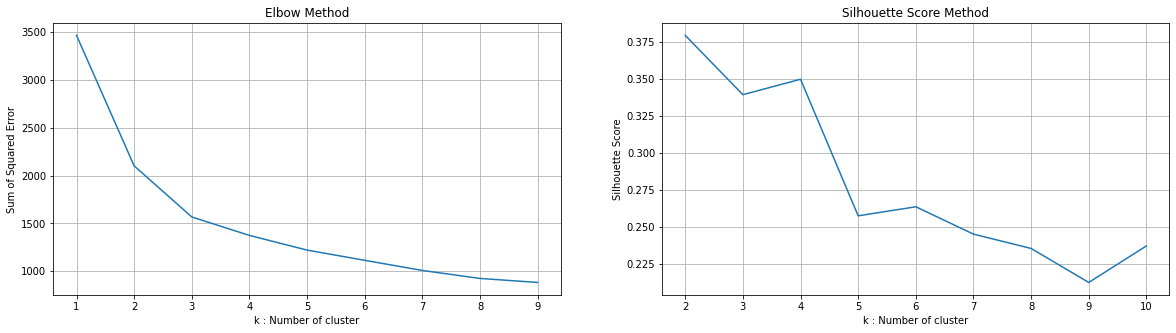

In [84]:
evaluate(df_new)